### 載入工具

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### 資料：訓練集、標籤集

[ 0.62434536 -1.61175641] [0.]
[0.96463208 3.11060505] [1.]


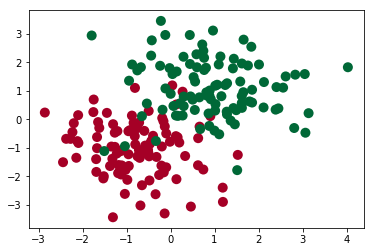

In [2]:
tf.set_random_seed(1)
np.random.seed(1)

# fake data
n_data = np.ones((100, 2))
x0 = np.random.normal(-1*n_data, 1)      # class0 x shape=(100, 2)
x1 = np.random.normal(1*n_data, 1)     # class1 x shape=(100, 2)
y0 = np.zeros(100)                      # class0 y shape=(100, )
y1 = np.ones(100)                       # class1 y shape=(100, )
x_train = np.vstack((x0, x1))           # shape (200, 2) + some noise
y_train = np.hstack((y0, y1))[:, np.newaxis] # shape (200, )

print(x_train[0], y_train[0])
print(x_train[-1], y_train[-1])

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.reshape(200,), s=100, lw=0, cmap='RdYlGn')
plt.show()

### 建構 Tensorflow 的 Graph

In [3]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

hypothesis = tf.layers.dense(x, 1)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=hypothesis))
hypothesis = tf.nn.sigmoid(hypothesis)

train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

predict = tf.cast(tf.greater_equal(hypothesis, 0.5), tf.float32)
correct = tf.cast(tf.equal(predict, y), tf.float32)
accuracy = tf.reduce_mean(correct)

### 建 Session、初始變數、開始訓練

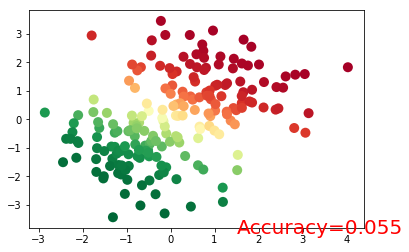

step 0 accuracy 0.055 cost 2.347803


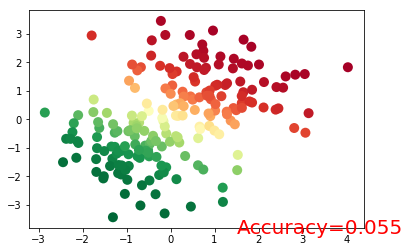

step 100 accuracy 0.055 cost 2.1895592


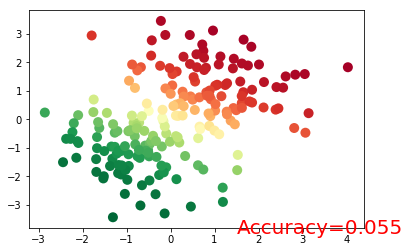

step 200 accuracy 0.055 cost 2.0359373


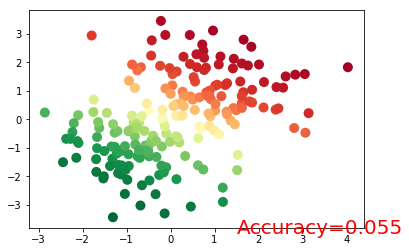

step 300 accuracy 0.055 cost 1.8875881


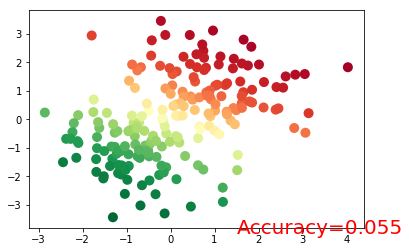

step 400 accuracy 0.055 cost 1.7452103


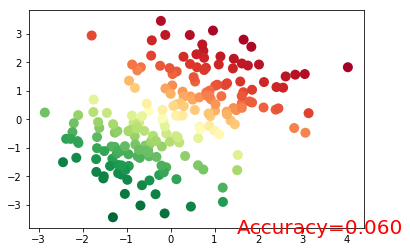

step 500 accuracy 0.06 cost 1.6095291


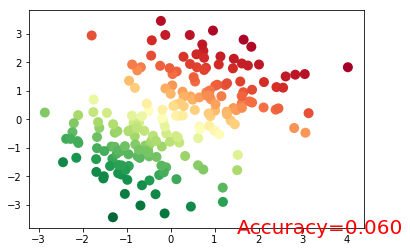

step 600 accuracy 0.06 cost 1.4812613


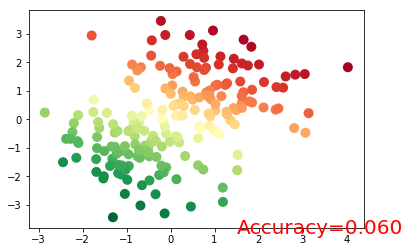

step 700 accuracy 0.06 cost 1.3610752


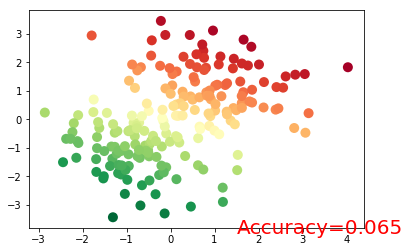

step 800 accuracy 0.065 cost 1.2495365


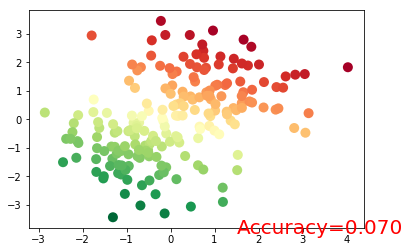

step 900 accuracy 0.07 cost 1.1470551


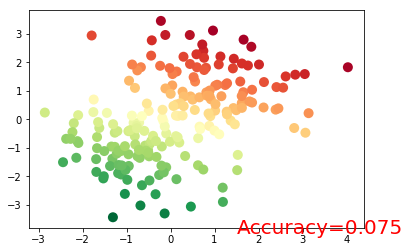

step 1000 accuracy 0.075 cost 1.0538379


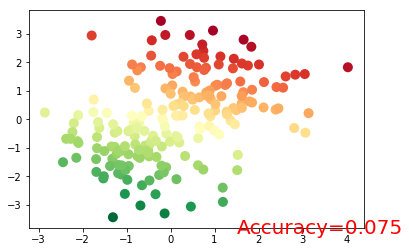

step 1100 accuracy 0.075 cost 0.96985734


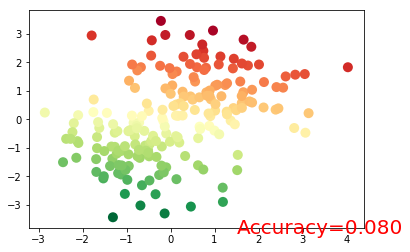

step 1200 accuracy 0.08 cost 0.89484817


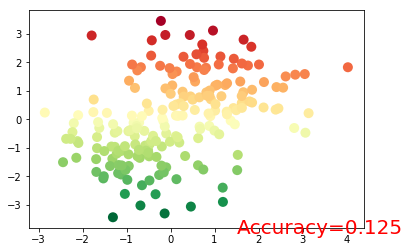

step 1300 accuracy 0.125 cost 0.82833284


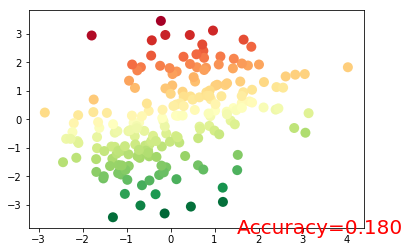

step 1400 accuracy 0.18 cost 0.76967025


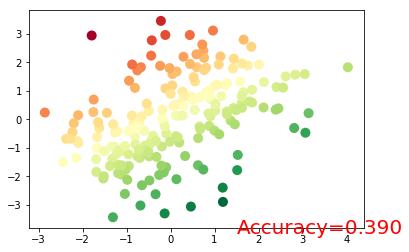

step 1500 accuracy 0.39 cost 0.7181178


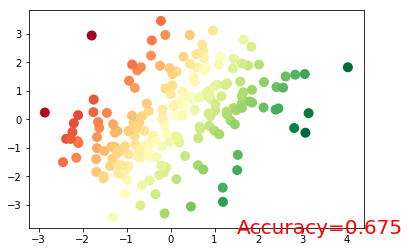

step 1600 accuracy 0.675 cost 0.67289245


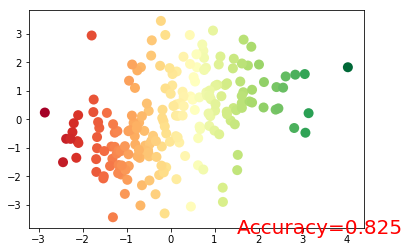

step 1700 accuracy 0.825 cost 0.63322234


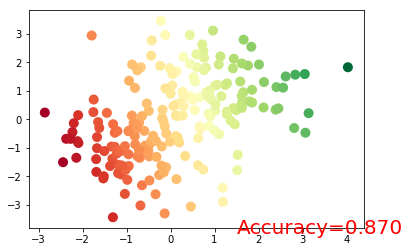

step 1800 accuracy 0.87 cost 0.5983822


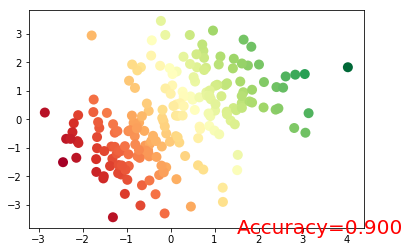

step 1900 accuracy 0.9 cost 0.56771433


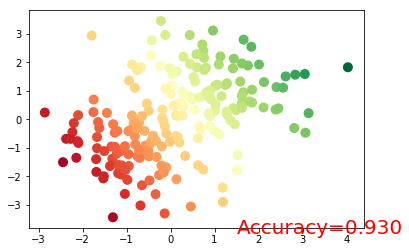

step 2000 accuracy 0.93 cost 0.5406375


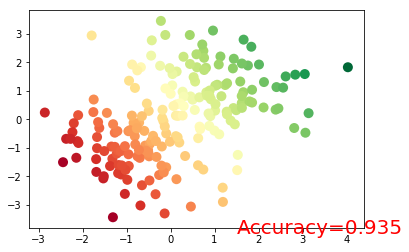

step 2100 accuracy 0.935 cost 0.51664686


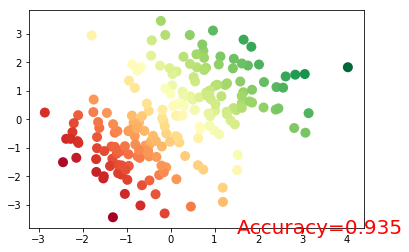

step 2200 accuracy 0.935 cost 0.49530938


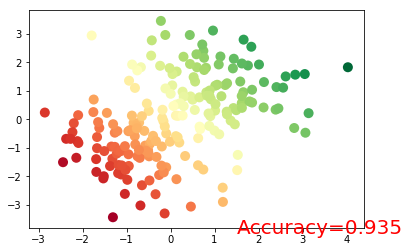

step 2300 accuracy 0.935 cost 0.4762561


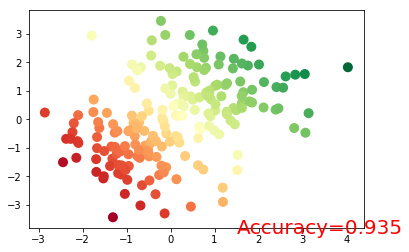

step 2400 accuracy 0.935 cost 0.4591742


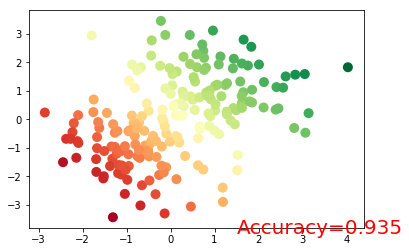

step 2500 accuracy 0.935 cost 0.44379905


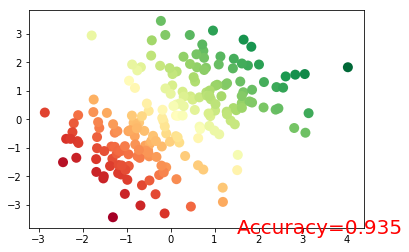

step 2600 accuracy 0.935 cost 0.42990667


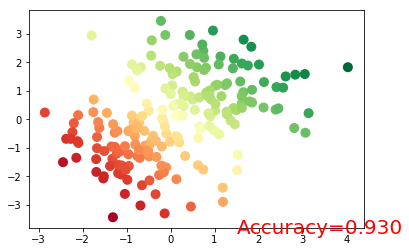

step 2700 accuracy 0.93 cost 0.41730714


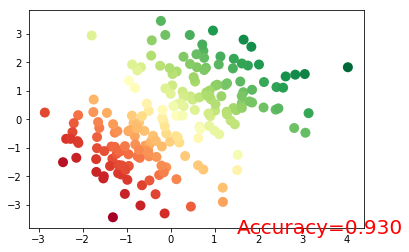

step 2800 accuracy 0.93 cost 0.40583932


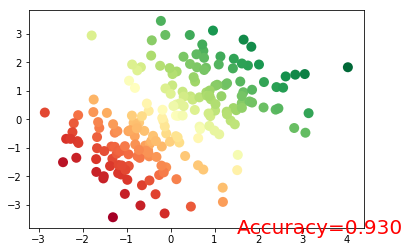

step 2900 accuracy 0.93 cost 0.39536607


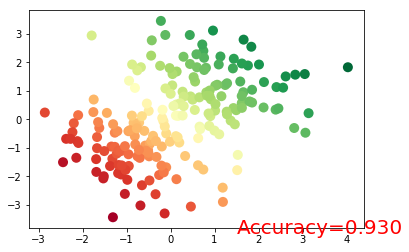

step 3000 accuracy 0.93 cost 0.3857701


In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3001):
    y_, a_, c_, _ = sess.run([hypothesis, accuracy, cost, train], feed_dict={x:x_train, y:y_train})
    if step%100 == 0:
        plt.cla()
        plt.scatter(x_train[:, 0], x_train[:, 1], c=y_.reshape(200, ), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.3f' % a_, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
        print('step', step, 'accuracy', a_, 'cost', c_)
plt.show()

### 預測新資料

[[0.2822812]]


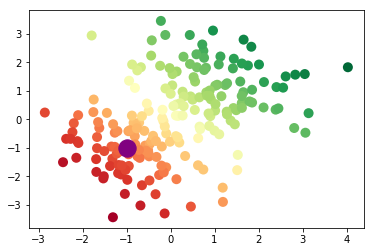

In [5]:
x_new = np.array([[-1, -1]])
print(sess.run(hypothesis, feed_dict={x:x_new}))

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_.reshape(200, ), s=100, lw=0, cmap='RdYlGn')
plt.scatter(x_new[0, 0], x_new[0, 1], c='purple', s=300)